In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset("titanic")

In [2]:
df.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


# Conditions

In [3]:
df[((df.embark_town == "Southampton") | (df.embark_town == "Cherbourg")) & (df.sex == "male")].head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df[(df.fare >= 5)].head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Unique Value

In [5]:
df.alive.unique()

array(['no', 'yes'], dtype=object)

# Summary

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Label indexing or reversing

In [7]:
df.loc[::-1].reset_index(drop=True).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
1,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
2,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
3,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
4,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


In [8]:
df.loc[:,::-1].head()

,alone,alive,embark_town,deck,adult_male,who,class,embarked,fare,parch,sibsp,age,sex,pclass,survived
0,False,no,Southampton,NaN,True,man,Third,S,7.2500,0,1,22.0,male,3,0
1,False,yes,Cherbourg,C,False,woman,First,C,71.2833,0,1,38.0,female,1,1
2,True,yes,Southampton,NaN,False,woman,Third,S,7.9250,0,0,26.0,female,3,1
3,False,yes,Southampton,C,False,woman,First,S,53.1000,0,1,35.0,female,1,1
4,True,no,Southampton,NaN,True,man,Third,S,8.0500,0,0,35.0,male,3,0


# Largest Value

In [9]:
df.age.value_counts().nlargest(2)

24.0    30
22.0    27
Name: age, dtype: int64

In [10]:
counts = df.embark_town.value_counts()
counts.nlargest(2).index

Index(['Southampton', 'Cherbourg'], dtype='object')

# String splitting into columns

In [11]:
dataframe = pd.DataFrame({'name':['Ahmad Ali','Asif Anjum','Fakhar Mehmood','Ábdullah Amjad'], 
                         'location':['Lahore,Pakistan','Faisalabad,Pakistan','Hamburg,Germany','QueensLand,Australia']})
dataframe

,name,location
0,Ahmad Ali,"Lahore,Pakistan"
1,Asif Anjum,"Faisalabad,Pakistan"
2,Fakhar Mehmood,"Hamburg,Germany"
3,Ábdullah Amjad,"QueensLand,Australia"


In [12]:
dataframe[['First Name','Last Name']] = dataframe.name.str.split(' ', expand =True)
dataframe[['City','Country']] = dataframe.location.str.split(',', expand = True)
dataframe = dataframe[['First Name','Last Name','City','Country']]
dataframe

,First Name,Last Name,City,Country
0,Ahmad,Ali,Lahore,Pakistan
1,Asif,Anjum,Faisalabad,Pakistan
2,Fakhar,Mehmood,Hamburg,Germany
3,Ábdullah,Amjad,QueensLand,Australia


#  Aggregate by multipl Groups/Functions

In [13]:
df.groupby('who').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [14]:
df.groupby('who').head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [15]:
df.groupby('who').sum()

C:\Users\Laptop\AppData\Local\Temp\ipykernel_2356\2979829937.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('who').sum()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
who,,,,,,,,
child,49,218,528.67,144,105,2721.2210,0,6
man,88,1274,13700.50,159,82,13352.0656,537,410
woman,205,565,6976.00,163,153,12620.6627,0,121


In [16]:
len(df.sex)

891

In [96]:
df.groupby(['sex','pclass','who']).count()

survived  age  sibsp  parch  fare  embarked  class  \
sex    pclass who                                                         
female 1      child         3    3      3      3     3         3      3   
              woman        91   82     91     91    91        89     91   
       2      child        10   10     10     10    10        10     10   
              woman        66   64     66     66    66        66     66   
       3      child        30   30     30     30    30        30     30   
              woman       114   72    114    114   114       114    114   
male   1      child         3    3      3      3     3         3      3   
              man         119   98    119    119   119       119    119   
       2      child         9    9      9      9     9         9      9   
              man          99   90     99     99    99        99     99   
       3      child        28   28     28     28    28        28     28   
              man         319  225    319    319   319       319    319   

                     adult_male  deck  embark_town  alive  alone  \
sex    pclass who                                                  
female 1      child           3     3            3      3      3   
              woman          91    78           89     91     91   
       2      child          10     1           10     10     10   
              woman          66     9           66     66     66   
       3      child          30     2           30     30     30   
              woman         114     4          114    114    114   
male   1      child           3     3            3      3      3   
              man           119    91          119    119    119   
       2      child           9     3            9      9      9   
              man            99     3           99     99     99   
       3      child          28     1           28     28     28   
              man           319     5          319    319    319   

                     age_categories  sex_number  embarked_number  \
sex    pclass who                                                  
female 1      child               3           3                3   
              woman              82          91               91   
       2      child              10          10               10   
              woman              64          66               66   
       3      child              30          30               30   
              woman              72         114              114   
male   1      child               3           3                3   
              man                98         119              119   
       2      child               9           9                9   
              man                90          99               99   
       3      child              28          28               28   
              man               225         319              319   

                     embarked_alpha  
sex    pclass who                    
female 1      child               3  
              woman              89  
       2      child              10  
              woman              66  
       3      child              30  
              woman             114  
male   1      child               3  
              man               119  
       2      child               9  
              man                99  
       3      child              28  
              man               319

In [101]:
df.groupby(['survived','sex','who'])['survived'].count()

survived  sex     who  
0         female  child     15
                  woman     66
          male    child     19
                  man      449
1         female  child     28
                  woman    205
          male    child     21
                  man       88
Name: survived, dtype: int64

# Select Specific Rows and Columns

In [18]:
df[['sex','who']]

,sex,who
0,male,man
1,female,woman
2,female,woman
3,female,woman
4,male,man
...,...,...
886,male,man
887,female,woman
888,female,woman
889,male,man


In [19]:
df.describe()
df.describe().loc['min':'max']

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


for taking just row

In [20]:
df.loc[[886,887]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,B,Southampton,yes,True


for taking column also 


In [21]:
df.describe().loc['min':'max',['survived','age']]

,survived,age
min,0.0,0.420
25%,0.0,20.125
50%,0.0,28.000
75%,1.0,38.000
max,1.0,80.000


In [22]:
df.describe().loc['min':'max','survived':'age']

,survived,pclass,age
min,0.0,1.0,0.420
25%,0.0,2.0,20.125
50%,0.0,3.0,28.000
75%,1.0,3.0,38.000
max,1.0,3.0,80.000


In [95]:
summary=df.agg(['max','min'])
summary.T

C:\Users\Laptop\AppData\Local\Temp\ipykernel_2356\3137018665.py:1: FutureWarning: ['embarked', 'class', 'deck', 'embark_town', 'embarked_alpha'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary=df.agg(['max','min'])


,max,min
survived,1,0
pclass,3,1
sex,male,female
age,80.0,0.42
sibsp,8,0
parch,6,0
fare,512.3292,0.0
who,woman,child
adult_male,True,False
alive,yes,no


# Reshape multiindex series

In [23]:
df.survived.mean()

0.3838383838383838

In [24]:
df.groupby('sex').survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [25]:
df.groupby(['sex','class']).survived.mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [26]:
df.groupby(['sex','class']).survived.mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Countinuous to Categorical 

In [27]:
pd.cut(df.age, bins= [0,18,25,99],labels=['child','young','adult']).head()
df['age_categories'] = pd.cut(df.age, bins=[0,18,25,99],labels=['child','young','adult'])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_categories
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,young
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult


In [94]:
df.loc[df['fare']==0].head(4) #to check something 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_categories,sex_number,embarked_number,embarked_alpha
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True,adult,1,0,C
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True,adult,1,0,C
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True,young,1,0,C
277,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True,NaN,1,0,C


In [28]:
df[(df['age_categories'] == 'young') ].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_categories
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,young
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False,young
37,0,3,male,21.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,young
44,1,3,female,19.0,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True,young


In [29]:
df[df['age_categories']=='young'].shape[0]

162

# Convert one set of value to another set

In [30]:
df['sex_number']=df.sex.map({'male':1,'female':0})
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_categories,sex_number
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,young,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,1


In [31]:
df['embarked_number']=df.embarked.factorize()[0]
df.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_categories,sex_number,embarked_number
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,1,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,0,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,1,0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN,1,2


In [32]:
# Assuming 'df' is your DataFrame and you've already factorized the 'embarked' column
df['embarked_number'] = df.embarked.factorize()[0]

# Create a mapping from numbers to letters (you can customize this as needed)
mapping = {0: 'C', 1: 'Q', 2: 'S'}  # Replace with your actual categories

# Map the numbers back to letters
df['embarked_alpha'] = df['embarked_number'].map(mapping)

# Display the first 6 rows
print(df.head(6))


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   
5         0       3    male   NaN      0      0   8.4583        Q  Third   

     who  adult_male deck  embark_town alive  alone age_categories  \
0    man        True  NaN  Southampton    no  False          young   
1  woman       False    C    Cherbourg   yes  False          adult   
2  woman       False  NaN  Southampton   yes   True          adult   
3  woman       False    C  Southampton   yes  False          adult   
4    man        True  NaN  Southampton    no   True          adult   
5    man        True  NaN   Queenstown    no   

# Transpose

In [33]:
dft = pd.DataFrame(np.random.rand(100,10),columns=list('abcdefghij'))
dft

,a,b,c,d,e,f,g,h,i,j
0,0.014067,0.750164,0.234687,0.159106,0.146501,0.516543,0.732367,0.343079,0.870077,0.378268
1,0.644919,0.982862,0.553406,0.810081,0.190304,0.963681,0.997065,0.662606,0.177840,0.415793
2,0.661639,0.151209,0.665088,0.883924,0.073727,0.028225,0.687251,0.565523,0.966343,0.275693
3,0.336431,0.356339,0.028789,0.543967,0.336991,0.860277,0.919624,0.612316,0.756655,0.604457
4,0.225171,0.832803,0.651139,0.394428,0.699319,0.695781,0.100293,0.432372,0.942055,0.651212
...,...,...,...,...,...,...,...,...,...,...
95,0.352911,0.289802,0.993467,0.789504,0.120829,0.787115,0.608293,0.723208,0.896084,0.316861
96,0.004059,0.239212,0.916189,0.006001,0.364744,0.247856,0.294907,0.904366,0.837171,0.112126
97,0.426852,0.984987,0.674120,0.581416,0.081709,0.829667,0.608001,0.478752,0.946702,0.057173
98,0.845380,0.854904,0.189136,0.171377,0.854061,0.686402,0.276240,0.722513,0.219077,0.845024


In [34]:
dft.describe().T

,count,mean,std,min,25%,50%,75%,max
a,100.0,0.502156,0.288631,0.000060,0.264532,0.509028,0.759499,0.997926
b,100.0,0.485616,0.301072,0.002492,0.237535,0.439887,0.729241,0.992969
c,100.0,0.470470,0.269612,0.003601,0.221914,0.438520,0.689349,0.993467
d,100.0,0.531139,0.278964,0.006001,0.282332,0.567622,0.791974,0.988355
e,100.0,0.515071,0.299097,0.000510,0.261828,0.523317,0.784339,0.995133
f,100.0,0.503626,0.296818,0.003462,0.254485,0.506121,0.758025,0.999939
g,100.0,0.496765,0.289691,0.002251,0.250771,0.534918,0.697800,0.997065
h,100.0,0.513797,0.275570,0.008583,0.262074,0.531775,0.726407,0.974724
i,100.0,0.519228,0.294639,0.008467,0.262147,0.538284,0.775510,0.985731
j,100.0,0.481323,0.303737,0.006406,0.230520,0.459921,0.761670,0.961588


In [37]:
dfr=pd.DataFrame([['1345',100,200,300],['1234',400,500,600],['1456',700,800,900]],
                 columns=['zip','city_code','retail','warehouse'])
dfr.head()

,zip,city_code,retail,warehouse
0,1345,100,200,300
1,1234,400,500,600
2,1456,700,800,900


In [38]:
dfr.head().T

,0,1,2
zip,1345,1234,1456
city_code,100,400,700
retail,200,500,800
warehouse,300,600,900


In [42]:
abr=dfr.melt(id_vars = 'zip',var_name='location',value_name = 'retail')
abr

C:\Users\Laptop\AppData\Local\Temp\ipykernel_2356\2857860960.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  abr=dfr.melt(id_vars = 'zip',var_name='location',value_name = 'retail')


,zip,location,retail
0,1345,city_code,100
1,1234,city_code,400
2,1456,city_code,700
3,1345,retail,200
4,1234,retail,500
5,1456,retail,800
6,1345,warehouse,300
7,1234,warehouse,600
8,1456,warehouse,900


<Axes: xlabel='zip', ylabel='retail'>

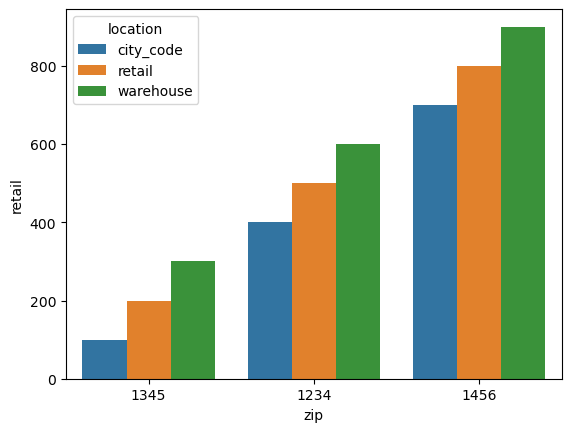

In [47]:
sns.barplot(x='zip',y='retail',hue='location',data=abr)

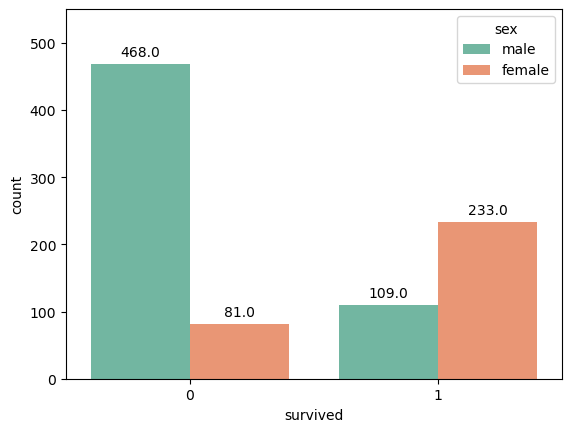

In [112]:
ax=sns.countplot(x='survived',hue='sex',data=df,palette ='Set2')
plt.ylim(0,550)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

plt.show()

In [92]:
df.loc[df['fare']==0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_categories,sex_number,embarked_number,embarked_alpha
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True,adult,1,0,C
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True,adult,1,0,C
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True,young,1,0,C
277,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True,NaN,1,0,C
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True,young,1,0,C
413,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True,NaN,1,0,C
466,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True,NaN,1,0,C
481,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True,NaN,1,0,C
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True,adult,1,0,C
633,0,1,male,NaN,0,0,0.0,S,First,man,True,NaN,Southampton,no,True,NaN,1,0,C
